In [7]:
import dypac_masker
import pickle as pk
from nilearn.plotting import view_img
from nilearn import datasets

load a dypac model

In [2]:
subject = 'sub-02'
file_model = f'{subject}dataset-friends_tasks-s01_cluster-20_states-60_batches-3_reps-100.pickle'
pickle_in = open(file_model, "rb")
model = pk.load(pickle_in)
pickle_in.close()

Fetch a preprocessed dataset

In [17]:
from nilearn import datasets
n_subjects = 1
dev_dataset = datasets.fetch_adhd(n_subjects=n_subjects)
epi_filename = dev_dataset.func[0]

/home/pbellec/env/cneuromod_embeddings/lib/python3.8/site-packages/nilearn/datasets/func.py:515: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


# "hard parcels": the Schaefer atlas

In [ ]:
atlas = datasets.fetch_atlas_schaefer_2018()

In [ ]:
labels_masker = dypac_masker.LabelsMasker(model=model, labels=atlas.maps)

In [ ]:
view_img(labels_masker.masker_.inverse_transform(labels_masker.components_[:,2].todense().transpose()))

In [ ]:
r2_map = labels_masker.score(img=epi_filename)

In [ ]:
view_img(r2_map, vmax=1)

# "soft" parcels: the ICA atlas from Smith et al. (2009)

In [8]:
ica_maps = datasets.fetch_atlas_smith_2009()

In [10]:
maps_masker = dypac_masker.MapsMasker(model=model, maps=ica_maps.rsn70)

/home/pbellec/env/cneuromod_embeddings/lib/python3.8/site-packages/nilearn/input_data/nifti_masker.py:395: UserWarning: Persisting input arguments took 0.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  data = self._cache(filter_and_mask,



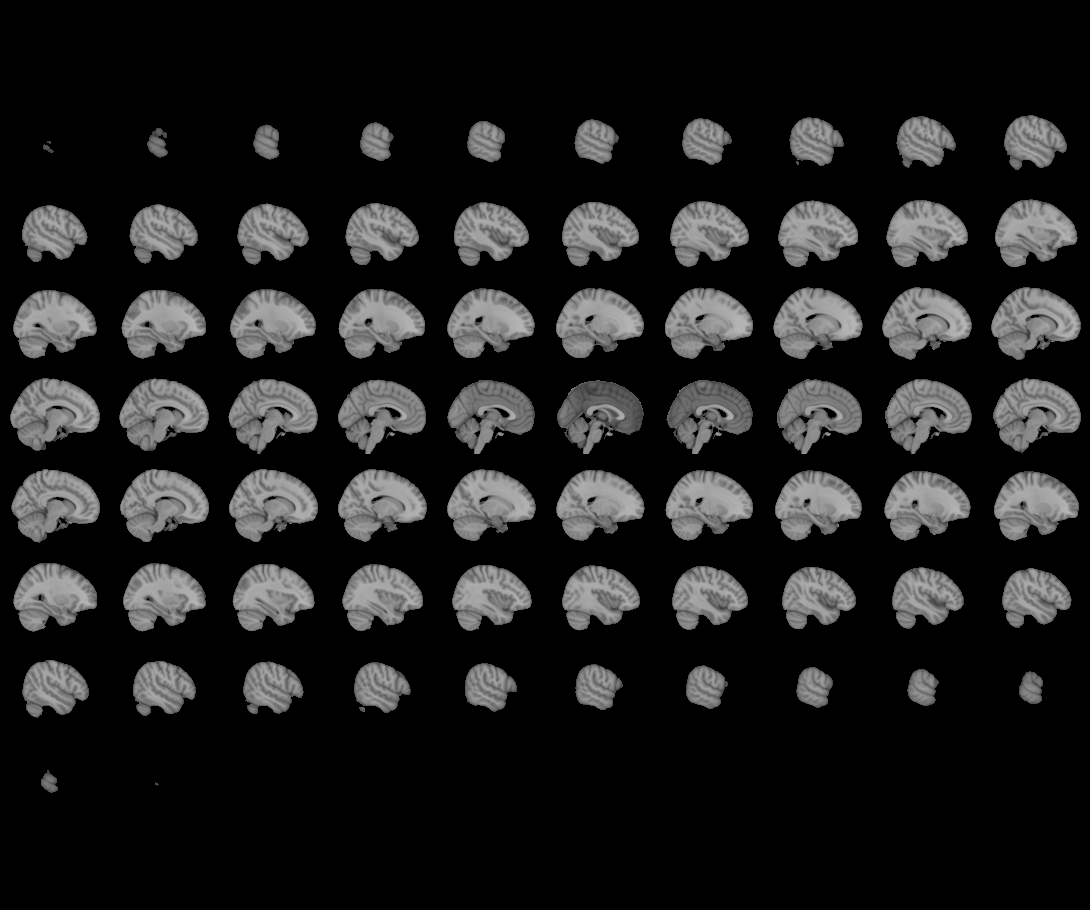
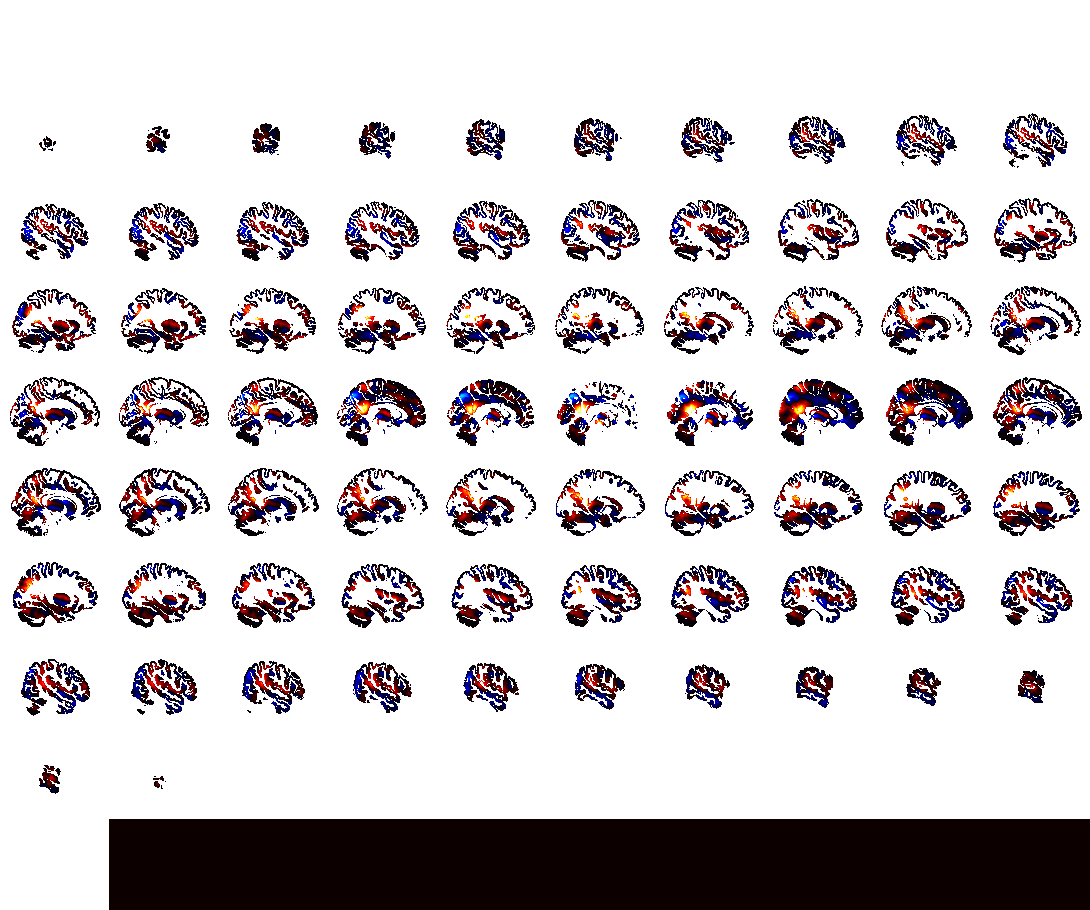

In [15]:
view_img(maps_masker.masker_.inverse_transform(maps_masker.components_[:, 5].transpose()))

In [18]:
r2_map = maps_masker.score(img=epi_filename)

[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz')
[MultiNiftiMasker.transform_imgs] Resampling images
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals



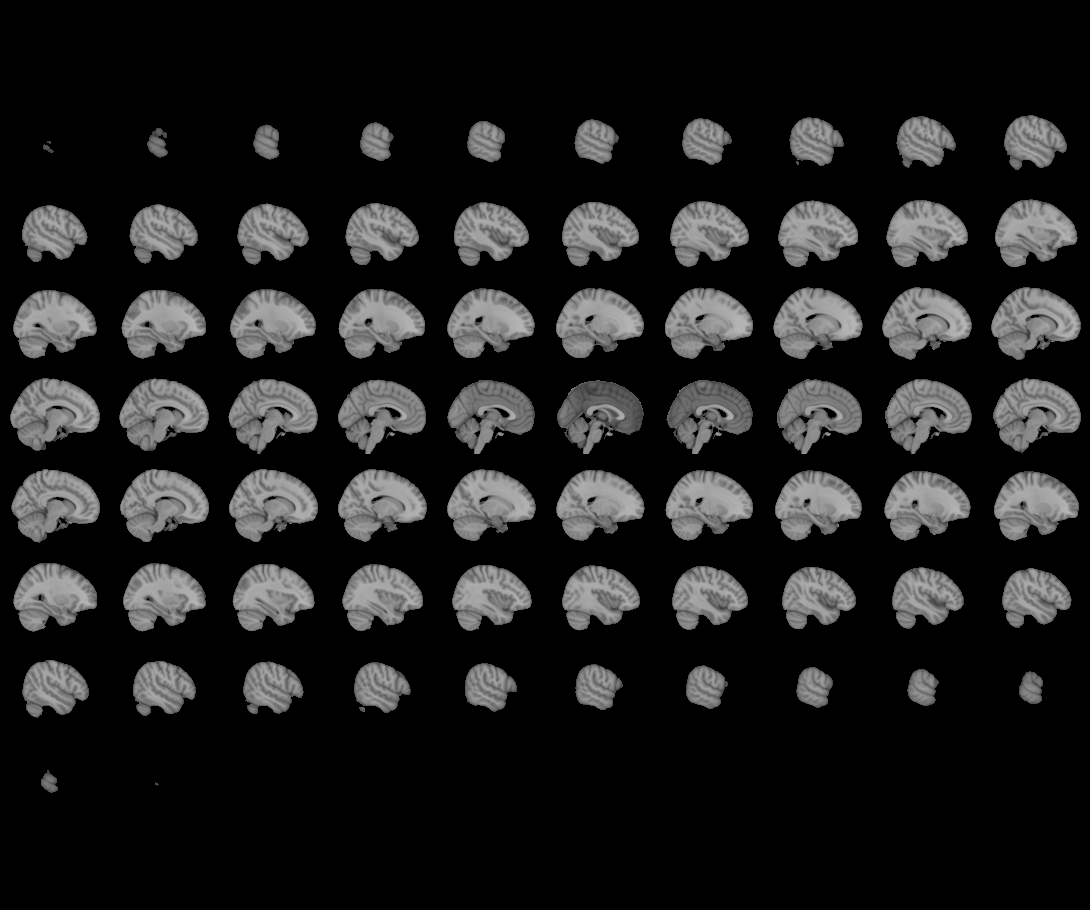
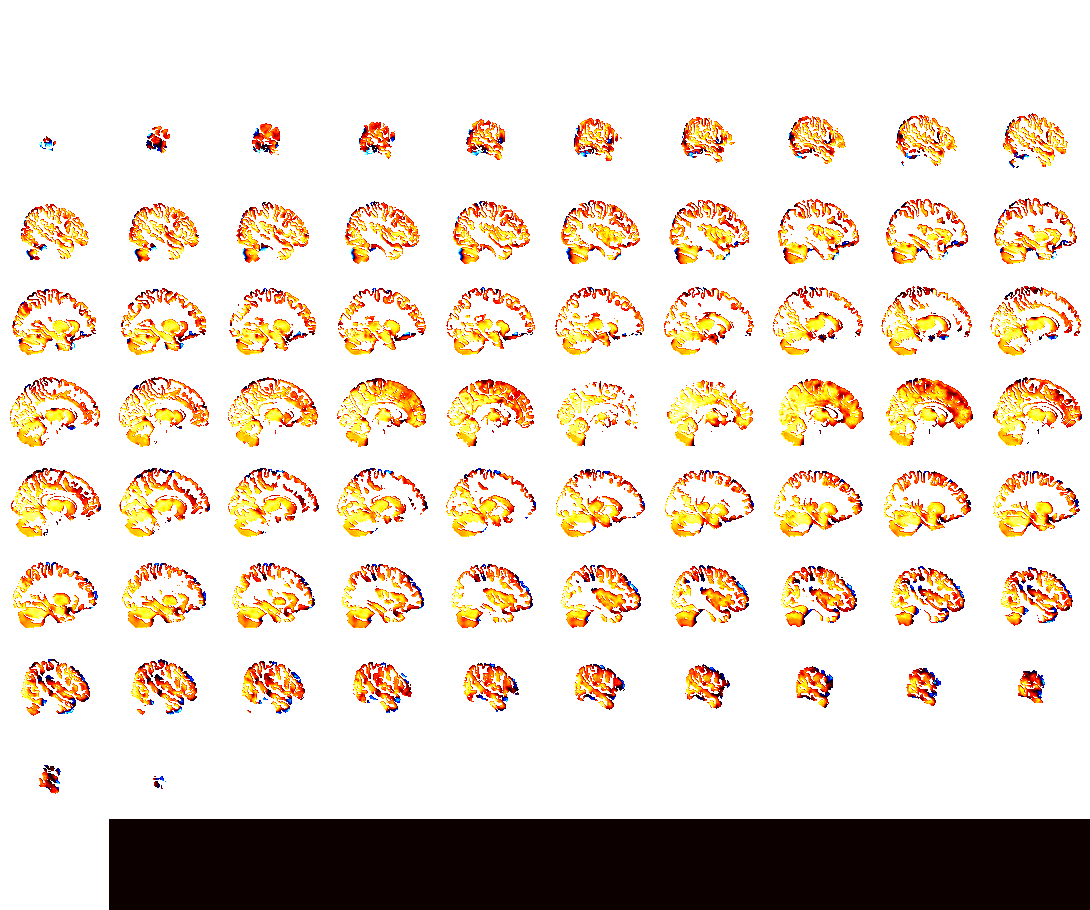

In [19]:
view_img(r2_map, vmax=1)